In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb


In [2]:
from pandas import read_csv

data = pd.read_csv(r'C:\Users\Tomas\Notebooks Python\Diplo Datos\Mentoria\rend_diario.csv',
                       index_col=0, parse_dates=True, dayfirst=True)

# data es el dataframe que contiene el rendimiento diario en dólares de todos los índices

data = data.iloc[1:5963, 2:13] # le quito la primer fila que está compuesta por NAs
data

,MERV_diario,BVSP_diario,GSPC_diario,NDX_diario,FTSE_diario,GDAXI_diario,FCHI_diario,N225_diario,HSI_diario,SSEC_diario,BSESN_diario
FECHA,,,,,,,,,,,
1997-07-03,0.929826,0.086285,1.425833,1.085122,3.001574,2.039279,1.116075,0.559379,-1.485951,-4.044444,-0.213017
1997-07-04,0.772897,-31.055785,-0.131839,0.114093,3.187888,0.070745,-0.191773,-0.811322,-1.866134,-2.074027,-0.662731
1997-07-07,0.416186,47.400318,-0.383430,0.343687,-3.596321,1.398478,0.414040,-0.513522,0.589664,-2.661495,-0.161848
1997-07-08,0.541217,0.748911,0.718043,1.490356,-0.997135,0.255689,-1.014525,0.611764,-0.457160,1.170353,0.404193
1997-07-09,-0.031313,-0.085095,-1.220138,0.426520,-0.184771,-0.077669,0.709948,-0.973793,-0.590586,1.005392,2.339823
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,-2.619989,-3.039523,0.424983,1.329758,-0.791903,-3.437021,-3.899993,0.087080,-2.568874,0.316158,-4.582589
2020-05-05,3.579307,0.919184,0.904056,1.092467,1.816908,1.870420,1.757611,0.328444,1.076674,0.105054,-0.847475
2020-05-06,0.007127,-2.570277,-0.697941,0.607351,-0.744739,-1.559158,-1.520238,0.471099,1.144511,-0.469735,0.716138


In [3]:
data.dtypes

MERV_diario     float64
BVSP_diario     float64
GSPC_diario     float64
NDX_diario      float64
FTSE_diario     float64
GDAXI_diario    float64
FCHI_diario     float64
N225_diario     float64
HSI_diario      float64
SSEC_diario     float64
BSESN_diario    float64
dtype: object

# Modelo VAR

Como estamos trabajando con los rendimientos diarios de los índices, nos encontramos ante una serie que ya es estacionaria, por lo que no es necesario aplicar diferencias y podemos pasar directamente a aplicar el modelo VAR sobre la serie. Al predecir directamente sobre los valores y no sobre sus diferencias, el modelo se llama "VAR en niveles". 

Uno se puede preguntar por qué aplicar un modelo VAR que involucre simultáneamente a todos los índices financieros (y su pasado) cuando talvez es más interpretable un modelo ARMA univariante aplicado a cada índice por separado. Y la respuesta es simple. Un modelo AR o ARMA univariado no tiene en cuenta las relaciones entre las variables al momento de predecir porque utiliza únicamente los valores anteriores de la propia variable en cuestión, en cambio el modelo VAR nos permite considerar todos los índices en simultáneo y la influencia que puedan ejercerse entre sí. 

Usar las relaciones entre las varaibles genera mejores predicciones porque incorpora el comportamiento dinámico de los datos. En esta época en que la globalizacion hace que las economías mundiales se encuentran más integradas que nunca, no sería realista analizar el mercado financiero de cada país por separado, ignorando la interconectividad que caracteriza el tiempo que vivimos. 

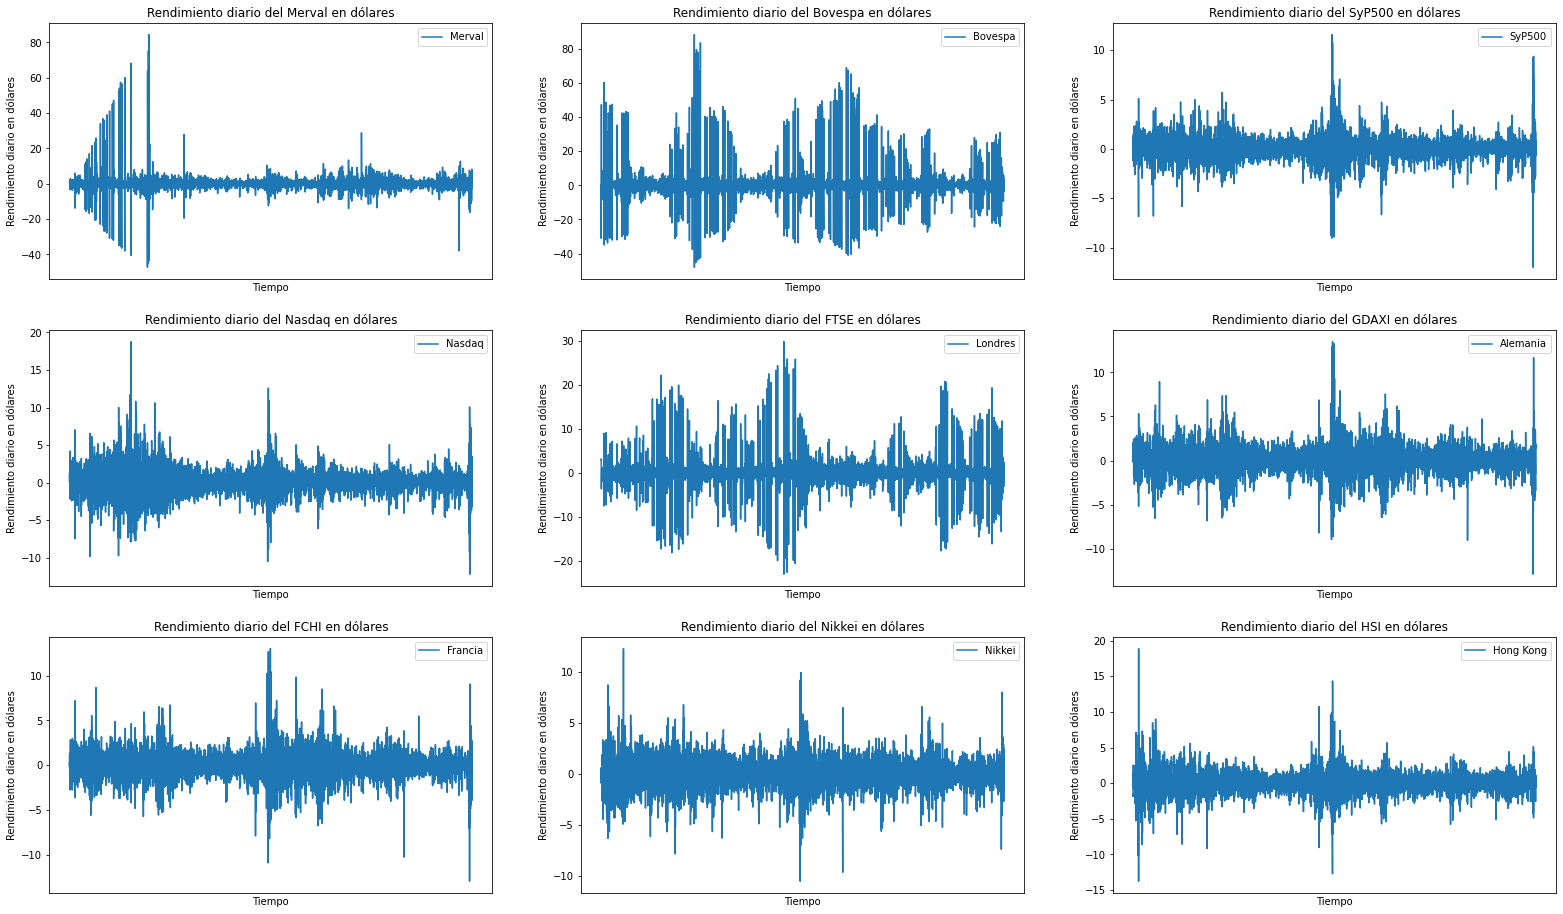

In [4]:
# el siguiente gráfico es útil para corroborar que las series de todos los índices financieros son efectivamente estacionarias

plt.figure(figsize=(27,16))

plt.subplot(331)
sb.lineplot(data = data.MERV_diario, label = "Merval")
plt.title('Rendimiento diario del Merval en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(332)
sb.lineplot(data = data.BVSP_diario, label = "Bovespa")
plt.title('Rendimiento diario del Bovespa en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(333)
sb.lineplot(data = data.GSPC_diario, label = "SyP500")
plt.title('Rendimiento diario del SyP500 en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(334)
sb.lineplot(data = data.NDX_diario, label = "Nasdaq")
plt.title('Rendimiento diario del Nasdaq en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(335)
sb.lineplot(data = data.FTSE_diario, label = "Londres")
plt.title('Rendimiento diario del FTSE en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(336)
sb.lineplot(data = data.GDAXI_diario, label = "Alemania")
plt.title('Rendimiento diario del GDAXI en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(337)
sb.lineplot(data = data.FCHI_diario, label = "Francia")
plt.title('Rendimiento diario del FCHI en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(338)
sb.lineplot(data = data.N225_diario, label = "Nikkei")
plt.title('Rendimiento diario del Nikkei en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(339)
sb.lineplot(data = data.HSI_diario, label = "Hong Kong")
plt.title('Rendimiento diario del HSI en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.savefig('son_todos_ruido_blanco.png')



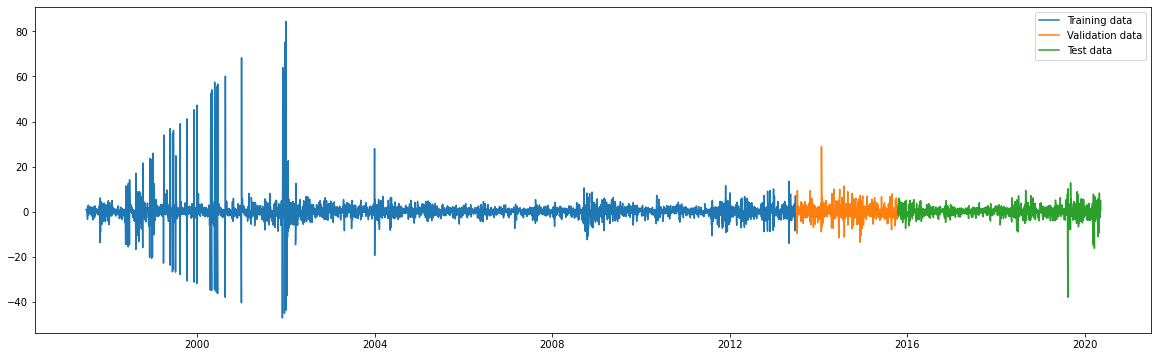

In [5]:
import warnings
warnings.filterwarnings("ignore")

#creating the train, validation and test set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):int(0.8*(len(data)))]
test = data[int(0.8*(len(data))):]

cols = data.columns 

# podemos ver cómo quedó la distribución del conjunto de entrenamiento y validación (para poder visualizar se usa sólo el MERVAL)

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(train.index,train['MERV_diario'], label='Training data')
ax.plot(valid.index, valid['MERV_diario'], label='Validation data')
ax.plot(test.index, test['MERV_diario'], label='Test data')
ax.legend()
plt.show()


##  Construcción del Modelo

Entrenamos un Modelo VAR sobre el conjunto de entrenamiento. Recordar que el conjunto de entrenamiento está formado por el primer 70% de los datos de TODOS los índices. El resultado del modelo será una lista de valores predichos para cada uno de los índices obtenidos basándose en los valores pasados del propio índice como de los demás. 

In [12]:
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

def aplicar_var(lags:int):
    modelo = VAR(endog=train)
    modelo_fit = modelo.fit(maxlags=lags)
    predicciones = modelo_fit.forecast(modelo_fit.y, steps=len(valid))
    predis = pd.DataFrame(index=range(0,len(predicciones)), columns=[cols])
    for j in range(0,11):
        for i in range(0, len(predicciones)):
           predis.iloc[i][j] = predicciones[i][j]
    validacion = valid.values.T.tolist()
    predis = predis.values.T.tolist()
    for (col,i) in zip(cols, range(len(validacion))):
        print('el error en ', col, 'es : ', mean_squared_error(validacion[i], predis[i]))
    
    for (col, i) in zip(cols, range(len(validacion))):
        pyplot.plot(validacion[i])
        pyplot.plot(predis[i], color = 'red')
        plt.title(col)
        pyplot.show()

A continuación obtnenemos el Error Cuadrático Medio resultante de aplicar el Modelo VAR (entrenado sobre el conjunto de entrenamiento) a los datos del conjunto de validación de todos los índices. También se puede observar un gráfico que compara para cada índices los verdaderos valores (en azul) con los valores predichos (en rojo)

el error en  MERV_diario es :  10.394002546287139
el error en  BVSP_diario es :  30.043149577150913
el error en  GSPC_diario es :  0.6102331004972503
el error en  NDX_diario es :  0.8540552899957164
el error en  FTSE_diario es :  3.8598165970582756
el error en  GDAXI_diario es :  1.3018935056013003
el error en  FCHI_diario es :  1.2415856426633107
el error en  N225_diario es :  1.3614027641595563
el error en  HSI_diario es :  1.0840798442718578
el error en  SSEC_diario es :  9.027210227156216
el error en  BSESN_diario es :  1.555296680973117


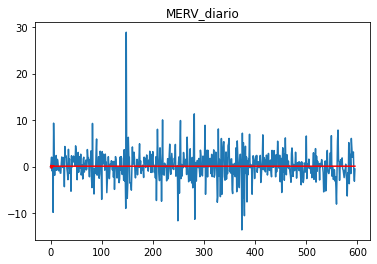

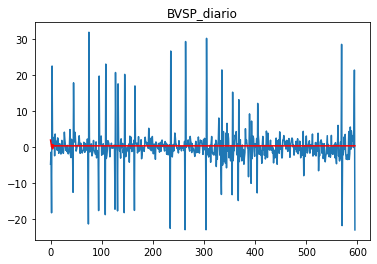

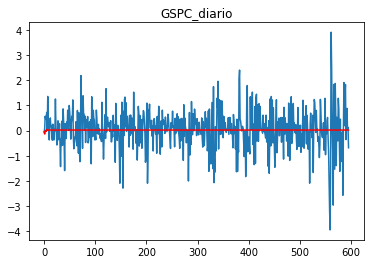

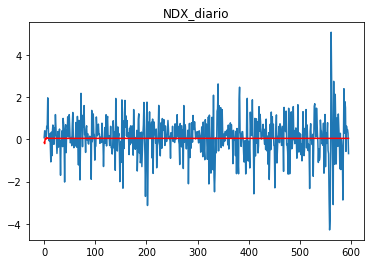

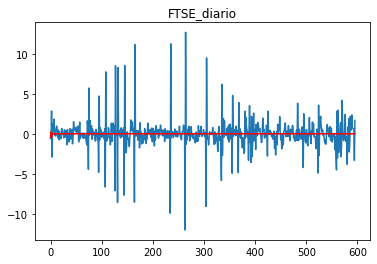

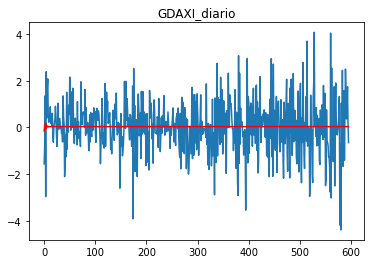

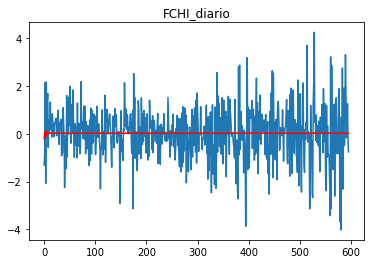

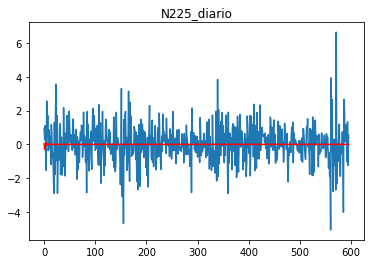

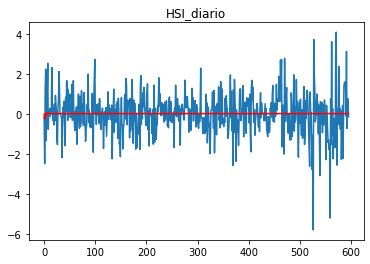

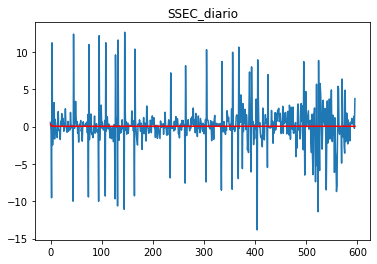

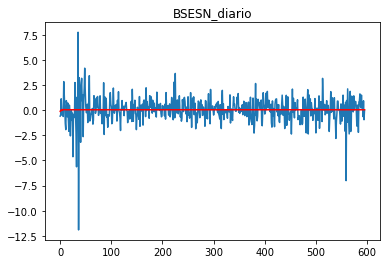

In [13]:
aplicar_var(5)

Los resultados anteriores se obtienen de aplicar el modelo VAR a cada índice considerando una determinada cantidad de valores pasados para cada uno de ellos (lags). Si bien se pueden seleccionar distintos valores de lagas para tener en cuenta, a continuación exploraremos cuál es la cantidad de lags que hay que considerar para minimizar el Error Cuadrático Medio promedio de todos los índices.

In [16]:
def testear_var(lags:int):
    modelo = VAR(endog=train)
    modelo_fit = modelo.fit(maxlags=lags)
    predicciones = modelo_fit.forecast(modelo_fit.y, steps=len(test))
    predis = pd.DataFrame(index=range(0,len(predicciones)), columns=[cols])
    for j in range(0,11):
        for i in range(0, len(predicciones)):
           predis.iloc[i][j] = predicciones[i][j]
    originales = test.values.T.tolist()
    predis = predis.values.T.tolist()
    for (col,i) in zip(cols, range(len(originales))):
         return mean_squared_error(originales[i], predis[i]).mean()
    
    for (col, i) in zip(cols, range(len(originales))):
        pyplot.plot(originales[i])
        pyplot.plot(predis[i], color = 'red')
        plt.title(col)
        pyplot.show()

In [17]:
results = pd.DataFrame(columns=['lags', 'mse'])
for lags in range(10, 21):
    mse = testear_var(lags)
    results = results.append({'lags': lags, 'mse': mse}, ignore_index=True)
ordered_results = results.sort_values(by=['mse', 'lags']).reset_index(drop=True)
ordered_results

,lags,mse
0,10.0,6.927321
1,14.0,6.931622
2,17.0,6.933043
3,11.0,6.934338
4,15.0,6.934830
5,12.0,6.935119
6,18.0,6.935361
7,13.0,6.935445
8,16.0,6.937892
9,20.0,6.942475


El mejor modelo resulta cuando se utilizan 10 lags, asique veremos cómo quedan los gráficos de las observaciones verdaderas contra las predichas cuando se utilizan 10 lags

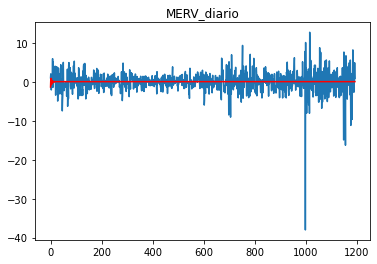

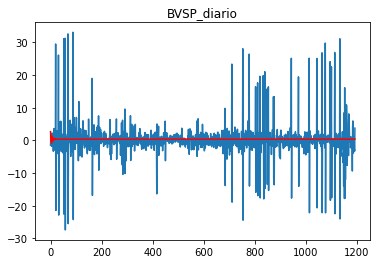

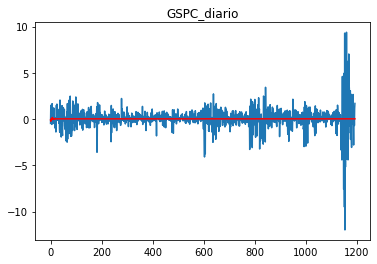

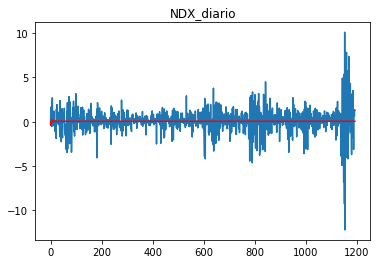

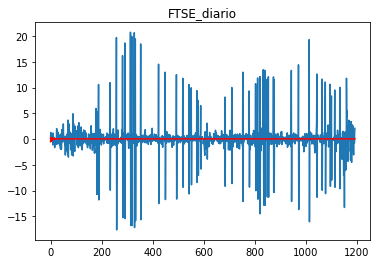

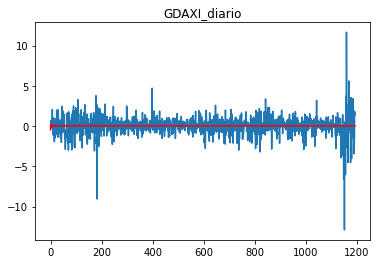

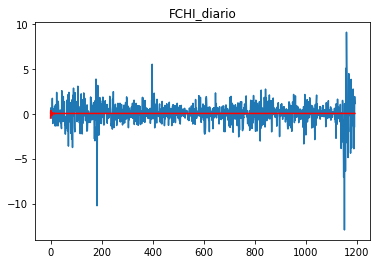

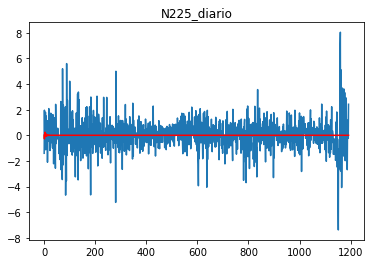

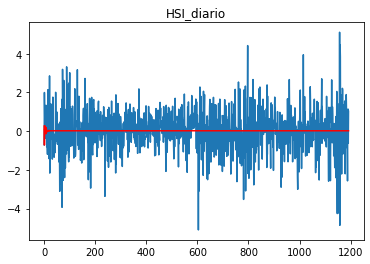

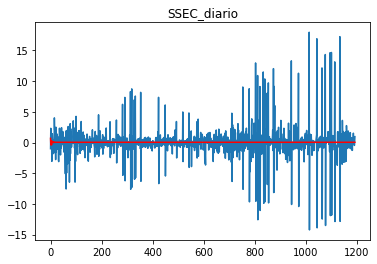

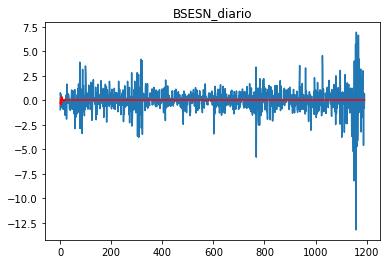

In [19]:
def graficos(lags:int):
    modelo = VAR(endog=train)
    modelo_fit = modelo.fit(maxlags=lags)
    predicciones = modelo_fit.forecast(modelo_fit.y, steps=len(test))
    predis = pd.DataFrame(index=range(0,len(predicciones)), columns=[cols])
    for j in range(0,11):
        for i in range(0, len(predicciones)):
           predis.iloc[i][j] = predicciones[i][j]
    originales = test.values.T.tolist()
    predis = predis.values.T.tolist()
    for (col, i) in zip(cols, range(len(originales))):
        pyplot.plot(originales[i])
        pyplot.plot(predis[i], color = 'red')
        plt.title(col)
        pyplot.show()

graficos(10)

# Modelo VECM

El Modelo VECM es similar al modelo VAR con la diferencia de que se aplica a series no estacionarias. Por eso pasaremos a trabajar utilizando como datos el logaritmo de los índices en vez de los rendimientos diarios. Por supuesto que una alternativa sería simplemente aplicar primera diferencia a la serie logarítmica y quedarnos así con una serie estacionaria, a la cual le podríamos aplicar un Modelo ARMA o un Modelo VAR (de hecho esto ya lo hicimos cuando trabajamos con los rendimientos). Pero la desventaja de aplicar diferencia es el que se corre el riesgo de que en la serie resultante se pierdan o ignores ciertas relaciones de largo plazo en las variables que pueden ser importantes. En este respecto es que resulta conveniente utilizar un Modelo VECM, porque tiene la particularidad de que permite expresar la variación o evolución de la variable bajo consideración (en nuestro caso sería el cambio en la cotización de los índices) como la suma de dos componentes (sin contar el componente aleatorio o error aleatorio obviamente):

    - Un componente que muestra las relaciones de equilibrio de largo plazo. Estas relaciones de largo plazo son conocidas como relaciones de cointegración y consisten en combinaciones lineales estacionarias de las series (las cuales son no estacionarias). 
    - Otro componente que capta el ajuste de corto plazo que va realizando la variable

El procedimiento para aplicar un Modelo VECM suele comenzar aplicando sobre las series no estacionarias la Prueba de Johansen porque la misma nos dirá si las relaciones de cointegración (relaciones de largo plazo) existen y si son significativas. Si la respuesta de la Prueba de Johansen es afirmativa, entonces lo conveniente es utilizar un Modelo VECM en vez de un VAR, porque el VECM combina en su análisis los niveles (relaciones de largo plazo) como las diferencias (relaciones de corto plazo) de la serie. 

In [20]:
datos = pd.read_csv(r'C:\Users\Tomas\Notebooks Python\Diplo Datos\Mentoria\serielog.csv',
                       index_col=0, parse_dates=True, dayfirst=True)
datos = datos.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]]
datos

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN
FECHA,,,,,,,,,,,
1997-07-02,6.714504,9.418606,6.806863,6.883391,8.977220,8.375751,8.091117,5.172511,7.587500,4.970511,4.796275
1997-07-03,6.723759,9.419469,6.821020,6.894184,9.006794,8.395939,8.102216,5.178089,7.572529,4.929226,4.794143
1997-07-04,6.731459,9.047596,6.819701,6.895324,9.038176,8.396646,8.100296,5.169943,7.553691,4.908267,4.787493
1997-07-07,6.735612,9.435578,6.815859,6.898755,9.001550,8.410534,8.104428,5.164795,7.559571,4.881292,4.785874
1997-07-08,6.741009,9.443040,6.823014,6.913548,8.991528,8.413088,8.094231,5.170894,7.554989,4.892927,4.789907
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,5.685041,9.557986,7.952524,9.086376,8.875144,9.342875,8.471311,5.214559,8.021481,6.008027,6.044615
2020-05-05,5.720208,9.567136,7.961524,9.097241,8.893150,9.361406,8.488735,5.217838,8.032190,6.009077,6.036104
2020-05-06,5.720279,9.541097,7.954520,9.103296,8.885674,9.345692,8.473415,5.222538,8.043570,6.004368,6.043240


Datos de entrenamiento: (4770, 11)
Datos de test: (1194, 11)


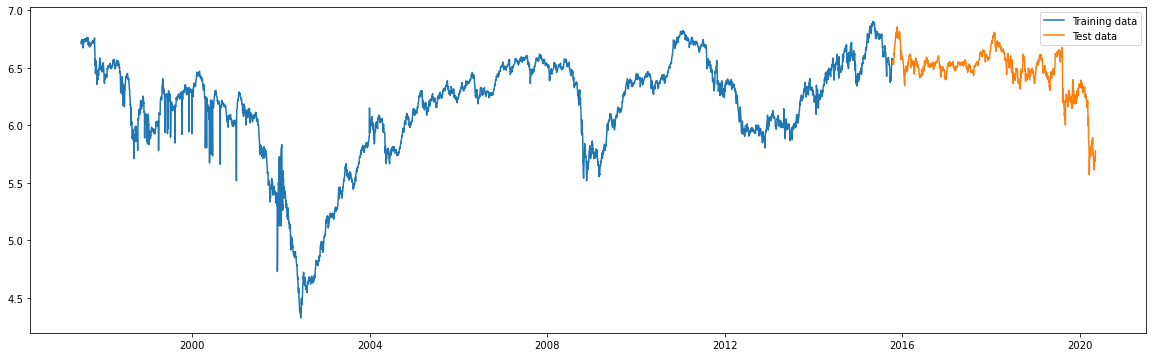

In [29]:
#creating the train and validation set
train_set = datos[:int(0.8*(len(datos)))]
test_set = datos[int(0.8*(len(data))):] 

# podemos ver cómo quedó la distribución del conjunto de entrenamiento y validación (para poder visualizar se usa sólo el MERVAL)

print('Datos de entrenamiento:', train_set.shape)
print('Datos de test:', test_set.shape)

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(train_set.index,train_set['MERV'], label='Training data')
ax.plot(test_set.index, test_set['MERV'], label='Test data')
ax.legend()
plt.show()

El primer paso es corroborar que las series logarítmicas de todos los índices efectivamente sean no estacionarias, para que tenga sentido aplicar el Modelo VECM. Para ello se usará el Test Augmented Dickey Fuller (ADF) en todas las columnas del dataset. Otra ventaja de aplicar este Test es que nos permitirá conocer la raíz de cada índice, la cual será util al momento de tener que especificar otro de los hiperparámetros del Modelo VECM que es la especificación de la parte determinística, es decir la constante o tendencia. 

In [21]:
from statsmodels.tsa.api import adfuller

def augmented_dickey_fuller_statistics(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

cols = datos.columns     

for col in cols:
    print('Índice:', col)
    print(augmented_dickey_fuller_statistics(datos[col]))


Índice: MERV
ADF Statistic: -2.344574
p-value: 0.157995
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
Índice: BVSP
ADF Statistic: -1.685791
p-value: 0.438448
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
Índice: GSPC
ADF Statistic: -0.645121
p-value: 0.860457
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
Índice: NDX
ADF Statistic: -0.337997
p-value: 0.919948
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
Índice: FTSE
ADF Statistic: -2.691408
p-value: 0.075537
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
Índice: GDAXI
ADF Statistic: -1.524183
p-value: 0.521516
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
Índice: FCHI
ADF Statistic: -2.783535
p-value: 0.060664
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
Índice: N225
ADF Statistic: -1.890506
p-value: 0.336540
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
None
Índice: HSI
ADF Statistic: -1.654245
p-value: 0.454828
Critical values:
	1%: -3.

Claramente todos las series son no estacionarias porque el estadpistico ADF se encuentra dentro de los valores críticos.  

A través del modelo VECM se pueden interpretar ecuaciones tanto de corto como de largo plazo, siempre y cuando se conozca el número de relaciones de cointegración existentes.

A continuación estimaremos un Modelo VECM, ya que el mismo puede ser valioso para identificar la parte dinámica de corto plazo de los datos incluso ante la ausencia de cointegración. Estimaremos un modelo VECM sobre los índices utilizando 9 lags, una relación de cointegración y una constante con esa cointegración.

In [35]:
vecm = VECM(endog = train_set, k_ar_diff = 9, coint_rank = 3, deterministic = 'ci')
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)

array([[6.53948931, 9.49420436, 7.60228313, 8.38037164, 9.175665  ,
        9.33954353, 8.56825864, 5.02088546, 7.97353709, 6.25182479,
        6.0224047 ],
       [6.54223139, 9.49063235, 7.60496593, 8.38448707, 9.17935826,
        9.34337511, 8.57208011, 5.0191975 , 7.97631326, 6.25117932,
        6.02702581],
       [6.54441917, 9.48119438, 7.60205291, 8.38270798, 9.1769935 ,
        9.3398808 , 8.57053426, 5.01883973, 7.9781498 , 6.25438447,
        6.02857618],
       [6.55320839, 9.51535097, 7.60325217, 8.38452104, 9.17594977,
        9.34010534, 8.57089706, 5.02009166, 7.98125074, 6.25839537,
        6.02617178],
       [6.54021236, 9.48364344, 7.60433682, 8.38693352, 9.17868929,
        9.33953596, 8.57073864, 5.02092424, 7.98453553, 6.25996484,
        6.02785006],
       [6.54316509, 9.49300368, 7.60122352, 8.3841021 , 9.17681518,
        9.33770974, 8.56989548, 5.01869236, 7.9813301 , 6.25561696,
        6.02234782],
       [6.5511139 , 9.49299532, 7.60288586, 8.3861092 , 9.

In [40]:
forecast, lower, upper = vecm_fit.predict(10, 0.05)
print("lower bounds of confidence intervals:")
print(lower.round(3))
print("\npoint forecasts:")
print(forecast.round(3))
print("\nupper bounds of confidence intervals:")
print(upper.round(3))

lower bounds of confidence intervals:
[[6.456 9.364 7.579 8.345 9.129 9.309 8.539 4.994 7.946 6.211 5.991]
 [6.443 9.351 7.572 8.335 9.126 9.299 8.529 4.981 7.935 6.2   5.981]
 [6.434 9.333 7.563 8.324 9.118 9.285 8.519 4.973 7.926 6.195 5.971]
 [6.433 9.361 7.559 8.318 9.113 9.278 8.512 4.967 7.92  6.192 5.959]
 [6.411 9.323 7.556 8.314 9.112 9.27  8.506 4.962 7.916 6.186 5.952]
 [6.406 9.324 7.549 8.305 9.106 9.262 8.499 4.955 7.906 6.174 5.939]
 [6.407 9.318 7.547 8.302 9.1   9.257 8.494 4.951 7.904 6.17  5.929]
 [6.4   9.315 7.544 8.299 9.098 9.252 8.49  4.946 7.896 6.165 5.923]
 [6.396 9.322 7.543 8.297 9.097 9.248 8.488 4.943 7.896 6.162 5.917]
 [6.388 9.307 7.54  8.293 9.095 9.245 8.485 4.94  7.893 6.157 5.911]]

point forecasts:
[[6.539 9.494 7.602 8.38  9.176 9.34  8.568 5.021 7.974 6.252 6.022]
 [6.542 9.491 7.605 8.384 9.179 9.343 8.572 5.019 7.976 6.251 6.027]
 [6.544 9.481 7.602 8.383 9.177 9.34  8.571 5.019 7.978 6.254 6.029]
 [6.553 9.515 7.603 8.385 9.176 9.34  8.571 5.

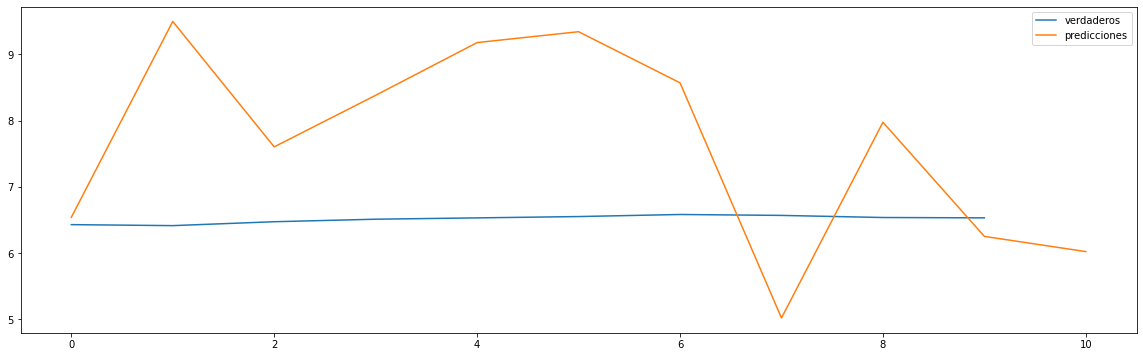

In [85]:
merval = train_set['MERV'].reset_index()
merval = merval.iloc[:,1]
merval = merval.tail(10)
merval = merval.values
merval

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(merval, label = "verdaderos")
ax.plot(forecast[0], label='predicciones')
ax.legend()
plt.show()